In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("C:/Users/Bao Yu/Desktop/project/data/dataset.csv")
data=data.iloc[:,1:]
data.head()

,unixtime,itbit_price,btce_price,stamp_price,datetime,t,log_btce,log_itbit,log_stamp
0,1396572190,441.50,439.5230,457.37723,4/3/2014,0,6.085690,6.090178,6.125508
1,1396578190,441.50,438.9990,447.54221,4/3/2014,1,6.084497,6.090178,6.103771
2,1396584190,438.87,433.9890,442.07505,4/4/2014,2,6.073019,6.084203,6.091480
3,1396590190,435.28,425.0000,442.08631,4/4/2014,3,6.052089,6.075990,6.091505
4,1396596190,444.56,441.1105,452.57262,4/4/2014,4,6.089295,6.097085,6.114948


In [3]:
#data['unixtime'][1]

In [4]:
import time
def timestamp_datetime(value):
    format = '%Y-%m-%d'
    value=int(value)
    time_local = time.localtime(value)
    dt = time.strftime(format, time_local)
    return dt

In [5]:
#timestamp_datetime(data['unixtime'][1])


In [6]:
data['datetime'] = data.unixtime.apply(timestamp_datetime)
data['datetime']=pd.to_datetime(data['datetime'],format='%Y/%m/%d')
data['datetime']

0       2014-04-03
1       2014-04-03
2       2014-04-04
3       2014-04-04
4       2014-04-04
           ...    
14439   2016-12-31
14440   2016-12-31
14441   2016-12-31
14442   2016-12-31
14443   2016-12-31
Name: datetime, Length: 14444, dtype: datetime64[ns]

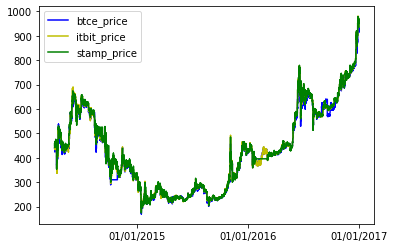

In [27]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data['datetime'],data['btce_price'],c='b')
plt.plot(data['datetime'],data['itbit_price'],c='y')
plt.plot(data['datetime'],data['stamp_price'],c='g')
plt.legend(['btce_price','itbit_price','stamp_price'],loc='best')
plt.show()

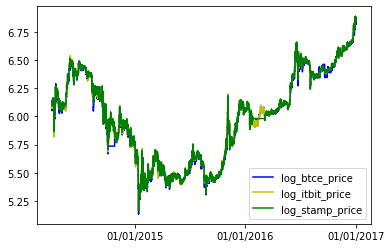

In [9]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data['datetime'],np.log(data['btce_price']),c='b')
plt.plot(data['datetime'],np.log(data['itbit_price']),c='y')
plt.plot(data['datetime'],np.log(data['stamp_price']),c='g')
plt.legend(['log_btce_price','log_itbit_price','log_stamp_price'],loc='best')
plt.show()

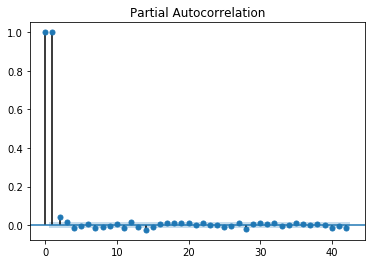

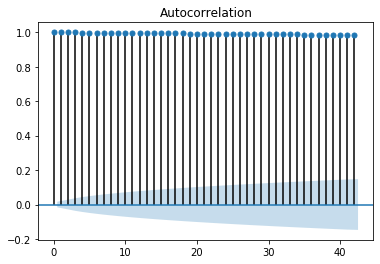

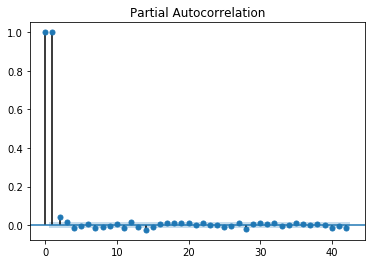

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 这个结果显示有点问题：关注一下
plot_acf(np.log(data.btce_price))
plot_pacf(np.log(data.btce_price))

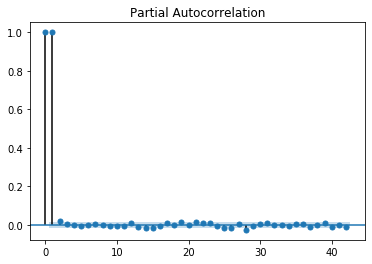

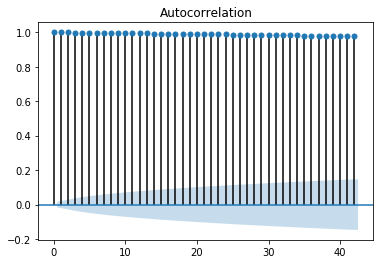

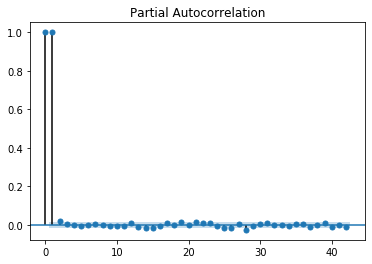

In [11]:
plot_acf(data.btce_price)
plot_pacf(data.btce_price)

In [12]:
# 计算自相关系数
import numpy as np
def autocorrelation(x,lags):#计算lags阶以内的自相关系数，返回lags个值，将序列均值、标准差视为不变
    n = len(x)
    x = np.array(x)
    variance = x.var()
    x = x-x.mean()
    result = np.correlate(x, x, mode = 'full')[-n+1:-n+lags+1]/(variance*(np.arange(n-1,n-1-lags,-1)))
    return result

In [13]:
n=autocorrelation(data.btce_price,10)
n

array([0.99951767, 0.99905738, 0.99860116, 0.99814368, 0.99768061,
       0.99722067, 0.99676389, 0.99630649, 0.99584329, 0.99537591])

In [14]:
from statsmodels.tsa.stattools import adfuller
 

btce_price_diff = np.diff(data.btce_price)
 

itbit_price_diff = np.diff(data.itbit_price)

stamp_price_diff=np.diff(data.stamp_price)
print(adfuller(data.btce_price))
print(adfuller(data.itbit_price))
print(adfuller(data.stamp_price))
# 说明price存在单位根

print(adfuller(btce_price_diff))
print(adfuller(itbit_price_diff))
print(adfuller(stamp_price_diff))


(0.638266039355768, 0.9885218099867344, 41, 14402, {'1%': -3.4308041359474744, '5%': -2.8617407078308563, '10%': -2.566876832040158}, 76757.85970790009)
(0.6616176831054155, 0.9890399194262315, 42, 14401, {'1%': -3.4308041674881267, '5%': -2.8617407217693516, '10%': -2.566876839459475}, 77718.59468294261)
(0.8207024283619635, 0.991963100124663, 42, 14401, {'1%': -3.4308041674881267, '5%': -2.8617407217693516, '10%': -2.566876839459475}, 87893.68090731534)
(-18.682152384512847, 2.0416148150355498e-30, 40, 14402, {'1%': -3.4308041359474744, '5%': -2.8617407078308563, '10%': -2.566876832040158}, 76751.91572552914)
(-17.51013208481919, 4.3393972201322864e-30, 42, 14400, {'1%': -3.4308041990331604, '5%': -2.861740735709783, '10%': -2.5668768468798224}, 77711.4423286852)
(-19.134198463919343, 0.0, 41, 14401, {'1%': -3.4308041674881267, '5%': -2.8617407217693516, '10%': -2.566876839459475}, 87887.2524257446)


In [15]:
# log_price 也有单位根
print(adfuller(np.log(data.btce_price)))
print(adfuller(np.log(data.itbit_price)))
print(adfuller(np.log(data.stamp_price)))

(-0.2727500203875953, 0.9292760575271944, 42, 14401, {'1%': -3.4308041674881267, '5%': -2.8617407217693516, '10%': -2.566876839459475}, -96971.05997168185)
(-0.3457174311666134, 0.9187751634645369, 17, 14426, {'1%': -3.430803380283876, '5%': -2.8617403738867497, '10%': -2.5668766542851706}, -96115.50498066403)
(-0.02915349512040355, 0.9560536746051839, 34, 14409, {'1%': -3.430803915285511, '5%': -2.8617406103155654, '10%': -2.5668767801337777}, -84234.02979882357)


In [16]:
#log_return is stationary
log_btce_price_diff = np.diff(np.log(data.btce_price))
 
log_itbit_price_diff = np.diff(np.log(data.itbit_price))

log_stamp_price_diff=np.diff(np.log(data.stamp_price))

print(adfuller(log_btce_price_diff))
print(adfuller(log_itbit_price_diff))
print(adfuller(log_stamp_price_diff))

(-18.482144456905683, 2.1325081766844092e-30, 41, 14401, {'1%': -3.4308041674881267, '5%': -2.8617407217693516, '10%': -2.566876839459475}, -96965.31605237913)
(-28.48771509796536, 0.0, 16, 14426, {'1%': -3.430803380283876, '5%': -2.8617403738867497, '10%': -2.5668766542851706}, -96109.71046704017)
(-23.729620261067424, 0.0, 33, 14409, {'1%': -3.430803915285511, '5%': -2.8617406103155654, '10%': -2.5668767801337777}, -84229.1760016475)


In [17]:
from statsmodels.tsa.stattools import coint
# 测试协整关系的存在(price)
print(coint(data.itbit_price, data.iloc[:,2:4],trend='ct'))

(-8.310448336585003, 5.7313950692883775e-11, array([-4.66434975, -4.11972348, -3.83573819]))


In [18]:
import statsmodels.api as sm
#获得协整系数
X = sm.add_constant(data.iloc[:,2:4])
coef = sm.OLS(data.itbit_price, X).fit().params
coef

C:\Users\Bao Yu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          0.070791
btce_price     0.358504
stamp_price    0.644386
dtype: float64

(-8.275089211789371, 4.679859911153338e-13, 40, 14403, {'1%': -3.4308041044112025, '5%': -2.8617406938942964, '10%': -2.5668768246218714}, 75143.1786244083)


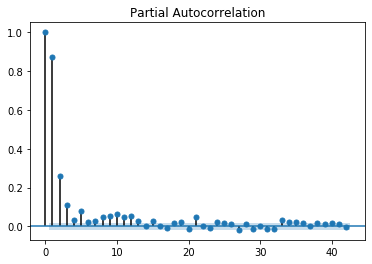

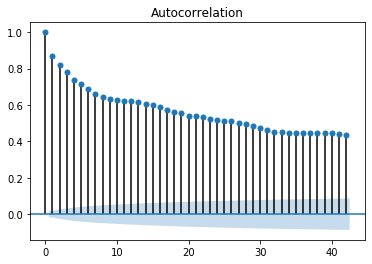

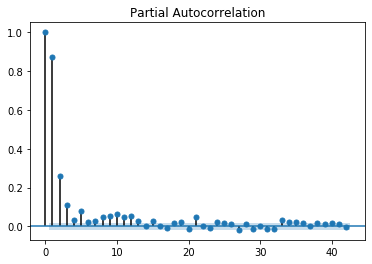

In [19]:
result=data['itbit_price'] - coef[1] *data['btce_price']-coef[2]*data['stamp_price']-coef[0]
print(adfuller(result))
plot_acf(result)
plot_pacf(result)

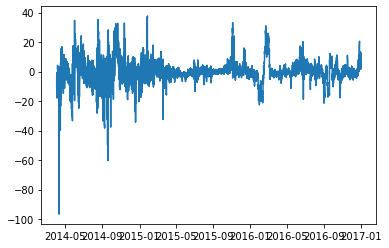

In [20]:
plt.plot(data['datetime'],result)

In [21]:
# 测试协整关系的存在(log_price)
print(coint(np.log(data.itbit_price), np.log(data.iloc[:,2:4]),trend='ct'))

(-8.174993766706832, 1.417718326212554e-10, array([-4.66434975, -4.11972348, -3.83573819]))


In [22]:
# 估计协整系数
X_log = sm.add_constant(np.log(data.iloc[:,2:4]))
coef_log = sm.OLS(np.log(data.itbit_price), X_log).fit().params
coef_log

const          0.012557
btce_price     0.358784
stamp_price    0.639669
dtype: float64

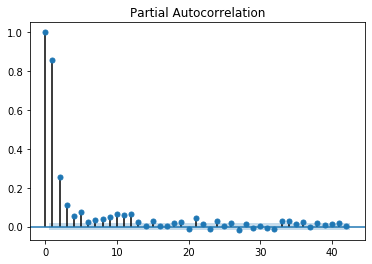

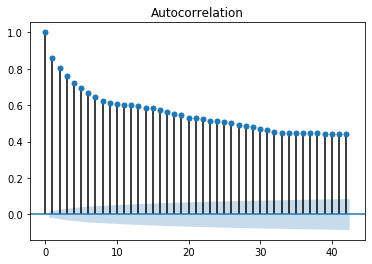

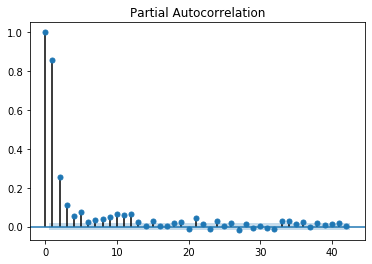

In [23]:
result_log=np.log(data['itbit_price']) - coef_log[1] *np.log(data['btce_price'])-coef_log[2]*np.log(data['stamp_price'])-coef[0]
plot_acf(result_log)
plot_pacf(result_log)

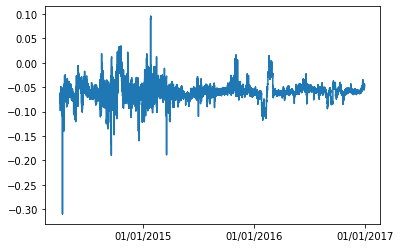

In [24]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data['datetime'],result_log)

In [25]:
adfuller(result_log)

(-8.145794057575491,
 9.99750153619179e-13,
 40,
 14403,
 {'1%': -3.4308041044112025,
  '5%': -2.8617406938942964,
  '10%': -2.5668768246218714},
 -96561.47751503452)